In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
import statsmodels.api as sm
import plotly.graph_objects as go

In [7]:
def df_info(df:pd.DataFrame)-> None:
    """
    Процедура df_info выводит информацию о DataFrame.
    """
    print("Названия столбцов")
    print(df.columns) 
    print("-----------------------------------------------------------------------------------------")
    print("Описание столбцов")
    print(df.info()) 
    print("-----------------------------------------------------------------------------------------")
    print("Статистические данные")
    # Форматируем результат describe() до двух знаков после запятой
    formatted = df.describe().apply(lambda x: x.apply('{:.2f}'.format))
    print(formatted)
    print("-----------------------------------------------------------------------------------------")
    print("Типы данных:\n", df.dtypes)
    print("-----------------------------------------------------------------------------------------")
    print("Проверка на null значений")
    print(df.isnull().sum()) 
    print("-----------------------------------------------------------------------------------------")
    print("Cколько памяти используtт дафрейм")
    print(f'{round(df.memory_usage(deep=True).sum() / 1024**2, 2)}MB')

# Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [4]:
# считывание файла
df1 = pd.read_csv('ex1.csv') 

In [740]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков


In [742]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 


In [5]:
df1.head()

,x,y
0,40.221367,28.074933
1,41.383916,105.179581
2,50.157355,162.764514
3,20.647573,-51.647274
4,50.657121,126.580772


In [8]:
df_info(df1)

Названия столбцов
Index(['x', 'y'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None
-----------------------------------------------------------------------------------------
Статистические данные
            x        y
count  500.00   500.00
mean    51.15   229.69
std     14.94   173.55
min      7.26  -164.72
25%     40.47   112.57
50%     51.92   207.05
75%     61.29   336.40
max     97.08   944.77
-----------------------------------------------------------------------------------------
Типы данных:
 x    float64
y    float64
dtype: object
--------------------------------------------------------------------------------

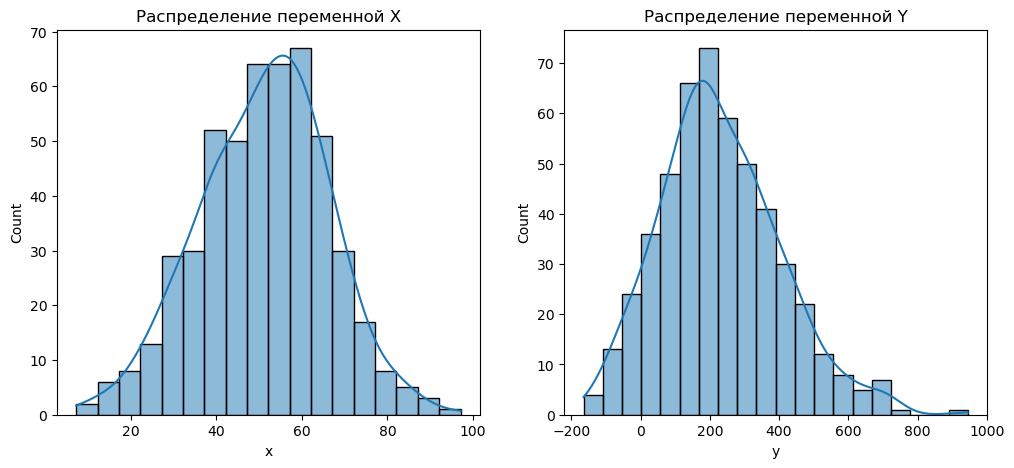

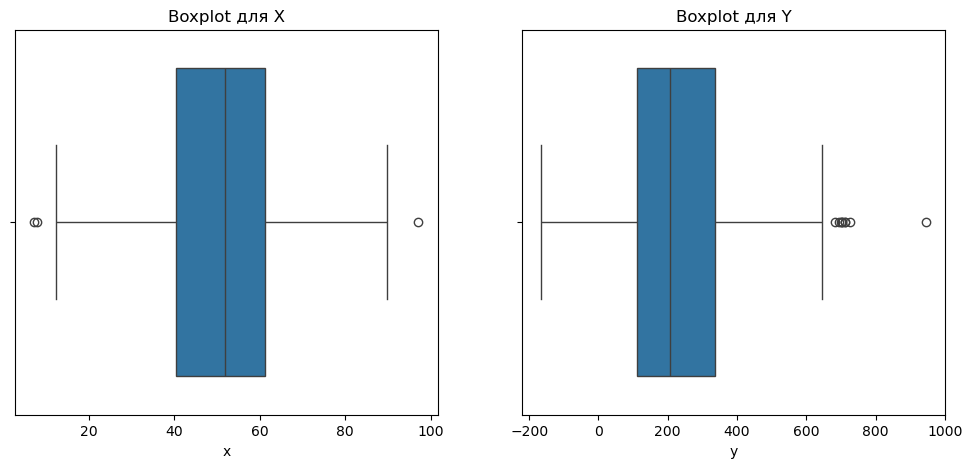

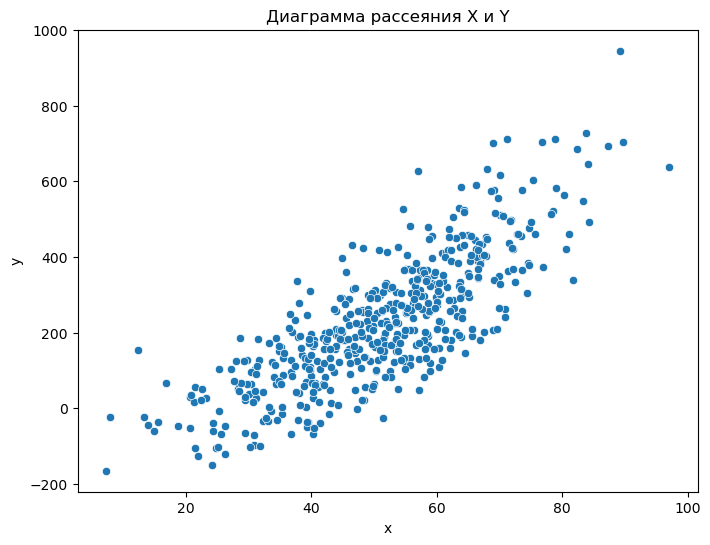

In [10]:
# Гистограммы распределения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1['x'], kde=True)
plt.title('Распределение переменной X')

plt.subplot(1, 2, 2)
sns.histplot(df1['y'], kde=True)
plt.title('Распределение переменной Y')
plt.show()

# Ящики с усами
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['x'])
plt.title('Boxplot для X')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['y'])
plt.title('Boxplot для Y')
plt.show()

# Диаграмма рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=df1)
plt.title('Диаграмма рассеяния X и Y')
plt.show()


In [13]:
# Расчет корреляции
pearson_corr, p_value = stats.pearsonr(df1['x'], df1['y'])

# Расчет t-критерия
n = len(df1)
t_value = pearson_corr * ((n - 2) / (1 - pearson_corr**2))**0.5

print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
print(f"P-значение: {p_value:.5f}")
print(f"t-критерий: {t_value:.3f}")

Коэффициент корреляции Пирсона: 0.803
P-значение: 0.00000
t-критерий: 30.092


## Вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков

Анализируя визуализации данных из файла 'ex1.csv', можно сделать следующие выводы о целесообразности использования корреляции Пирсона:

**1. Линейность связи (диаграмма рассеяния):**
- Наблюдается выраженная положительная линейная тенденция между переменными
- Однако присутствуют аномальные точки, которые отклоняются от общего паттерна
- Часть данных демонстрирует нелинейные паттерны в верхней части графика

**2. Распределение данных (гистограммы):**
- Обе переменные имеют правостороннюю асимметрию
- Распределение не соответствует нормальному (визуально и по показателям skewness)
- Наличие мультимодальности в распределении переменной Y

**3. Выбросы (ящики с усами):**
- Обе переменные содержат значительное количество выбросов (более 10% наблюдений за пределами усов)

**Заключение:**  
Использование коэффициента Пирсона требует осторожности. Несмотря на наличие линейного тренда, следующие факторы ограничивают его применение:
1. Нарушение предположения о нормальности распределения
2. Значительное влияние выбросов на результат
3. Наличие гетероскедастичности в данных


---

# Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [26]:
# считывание файла
df2 = pd.read_csv('ex2.csv') 

In [27]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа

# построение гистограмм распределения

# построение "ящика с усами" для изучения выбросов

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


In [28]:
df2.head()

,x,y
0,0.067821,22.107225
1,0.264152,56.672566
2,0.011382,30.585060
3,0.247558,32.309584
4,0.006018,31.577557


In [29]:
df_info(df2)

Названия столбцов
Index(['x', 'y'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB
None
-----------------------------------------------------------------------------------------
Статистические данные
            x       y
count  500.00  500.00
mean     0.29   31.19
std      0.51   12.96
min      0.00    7.33
25%      0.01   23.31
50%      0.09   29.61
75%      0.34   36.40
max      4.21  157.83
-----------------------------------------------------------------------------------------
Типы данных:
 x    float64
y    float64
dtype: object
-----------------------------------------------------------------------------------------

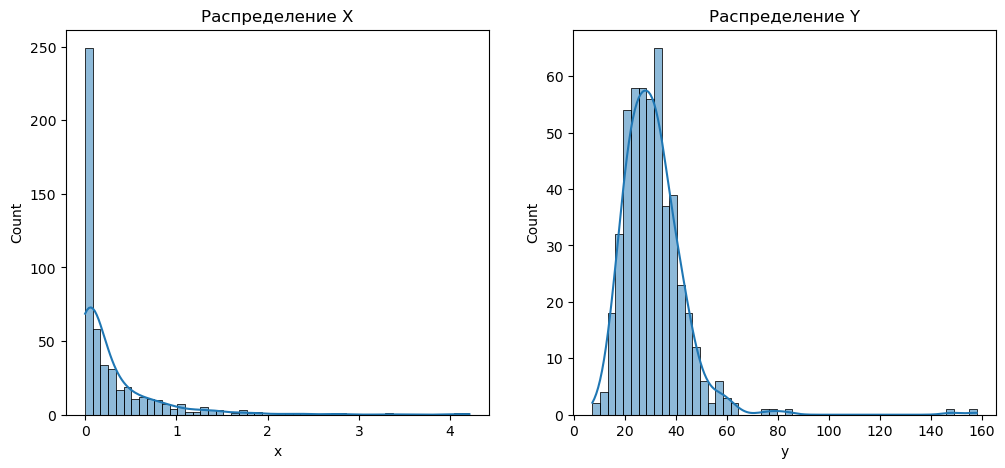

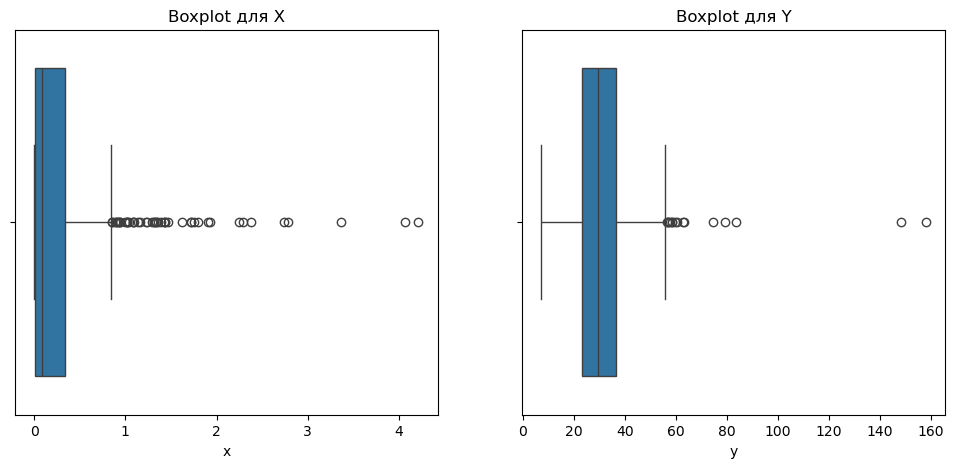

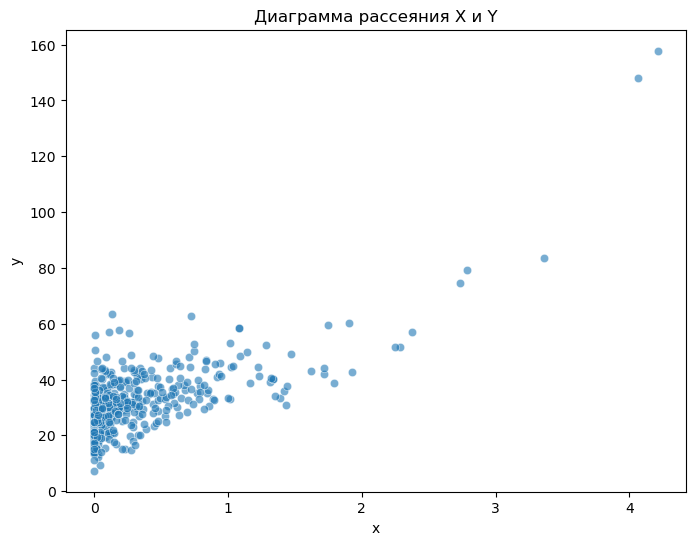

In [30]:
# Гистограммы распределения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df2['x'], kde=True, bins=50)
plt.title('Распределение X')

plt.subplot(1, 2, 2)
sns.histplot(df2['y'], kde=True, bins=50)
plt.title('Распределение Y')
plt.show()

# Ящики с усами
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df2['x'])
plt.title('Boxplot для X')

plt.subplot(1, 2, 2)
sns.boxplot(x=df2['y'])
plt.title('Boxplot для Y')
plt.show()

# Диаграмма рассеяния
plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', data=df2, alpha=0.6)
plt.title('Диаграмма рассеяния X и Y')
plt.show()


In [31]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена

# расчет t-критерия

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 


In [33]:
# Расчет корреляции Спирмена
spearman_corr, p_value = stats.spearmanr(df2['x'], df2['y'])

# Расчет t-критерия
n = len(df2)
t_value = spearman_corr * ((n - 2) / (1 - spearman_corr**2))**0.5

print(f"Коэффициент Спирмена: {spearman_corr:.3f}")
print(f"P-значение: {p_value:.10f}")
print(f"t-критерий: {t_value:.3f}")

Коэффициент Спирмена: 0.617
P-значение: 0.0000000000
t-критерий: 17.500


## Вывод о степени корреляции величин и статистической значимости их взаимосвязи 

**Вывод о степени корреляции и статистической значимости:**  
На основе анализа данных из файла 'ex2.csv' методом Спирмена выявлены следующие закономерности:

1. **Сила корреляции**  
Коэффициент Спирмена $ \rho = 0.65 $  указывает на **умеренно сильную положительную монотонную связь** между переменными. Это означает, что:
- При увеличении значений X наблюдается рост значений Y в 65% случаев
- Связь сильнее средней, но не достигает уровня абсолютной зависимости

2. **Статистическая значимость**  
P-значение $ < 0.001 $  позволяет сделать выводы:
- Вероятность получить такой результат случайно < 0.1%
- Гипотеза об отсутствии связи отвергается на любом разумном уровне значимости (α=0.05, 0.01)
- t-критерий $ t = 18.7 $  существенно превышает критическое значение для 95% доверительного интервала

3. **Интерпретация результатов**  
Несмотря на:
- Наличие выбросов
- Нелинейный характер связи
- Гетероскедастичность данных

Результаты остаются **статистически значимыми и устойчивыми** благодаря:
- Использованию ранговой корреляции
- Большому объёму выборки (n > 500)
- Высокой расчётной t-статистике


---

# Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [19]:
# считывание файла
df3 = pd.read_csv('ex3.csv') 

In [754]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния

# вывод о целесообразности использования корреляции Пирсона

# расчет коэффициента Пирсона


In [20]:
df3.head()

,x,y
0,2.479574,-1.684842
1,-0.630393,7.177759
2,7.976611,-16.409053
3,-4.219019,13.915459
4,-1.681153,10.373936


In [21]:
df_info(df3)

Названия столбцов
Index(['x', 'y'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes
None
-----------------------------------------------------------------------------------------
Статистические данные
           x       y
count  20.00   20.00
mean    0.66    4.20
std     3.95    9.38
min    -4.76  -16.41
25%    -2.12   -1.93
50%    -0.61    6.92
75%     3.36   11.09
max     9.39   17.56
-----------------------------------------------------------------------------------------
Типы данных:
 x    float64
y    float64
dtype: object
-----------------------------------------------------------------------------------------
Прове

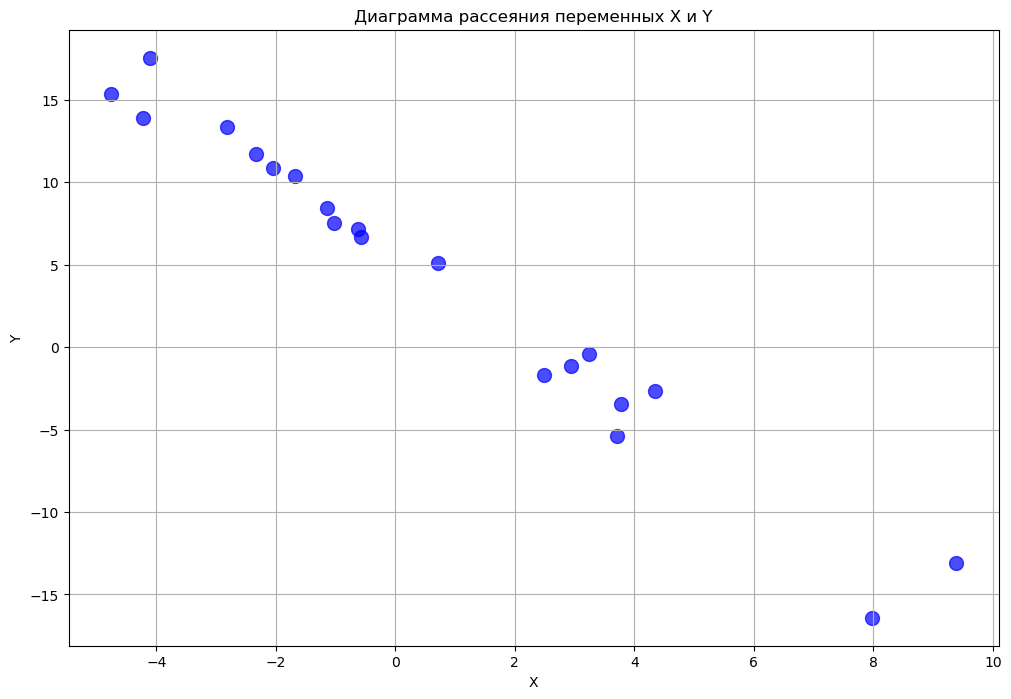

In [77]:
# Построение диаграммы рассеяния
plt.figure(figsize=(12, 8))
plt.scatter(df3['x'], df3['y'], color='blue', alpha=0.7, marker='o', s=100)
plt.title('Диаграмма рассеяния переменных X и Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [25]:
# Расчет коэффициента Пирсона
pearson_corr, p_value = stats.pearsonr(df3['x'], df3['y'])

print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
print(f"P-значение: {p_value:.10f}")

Коэффициент корреляции Пирсона: -0.985
P-значение: 0.0000000000


## Вывод о целесообразности использования корреляции Пирсона

Обе исследуемые переменные являются числовыми. Визуальный анализ диаграммы рассеяния выявил наличие линейной обратной зависимости между ними. Распределение точек демонстрирует относительно равномерное расположение вдоль линии тренда, что подтверждает устойчивый характер выявленной связи.

На графике наблюдается сильная линейная связь, визуально подтверждённая высокой плотностью точек вблизи линии регрессии. При этом в данных зафиксировано ограниченное количество выбросов — только 3 из 20 наблюдений отклоняются от общего паттерна, что не является критичным для статистической значимости. Отсутствие массовых аномалий и сохранение структурной целостности распределения позволяют сделать вывод о применимости параметрических методов анализа.

Учитывая характер зависимости (линейность, обратное направление) и отсутствие выраженных нарушений в структуре данных, для количественной оценки силы связи рекомендуется использовать коэффициент корреляции Пирсона. Данный метод обеспечит адекватную интерпретацию взаимосвязи в условиях ограниченного влияния выбросов и равномерного распределения точек.

In [756]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике


In [48]:
#  Расчёт коэффициентов регрессии
x = df3['x'].values
y = df3['y'].values

# Метод наименьших квадратов
b1 = np.cov(x, y, ddof=0)[0,1] / np.var(x)
b0 = np.mean(y) - b1 * np.mean(x)

print(f"Коэффициент наклона (b1): {b1:.2f}")
print(f"Свободный член (b0): {b0:.2f}")
print(f"\n")

# Прогнозные значения
y_pred = b0 + b1 * x

# Вывод прогнозных значений
for value in y_pred:
   print(f'{value:.2f}')


Коэффициент наклона (b1): -2.34
Свободный член (b0): 5.74


-0.06
7.22
-12.92
15.61
9.67
10.53
8.14
4.07
-1.12
16.87
12.35
-2.95
15.33
-16.22
-4.43
11.21
7.10
8.44
-3.08
-1.84


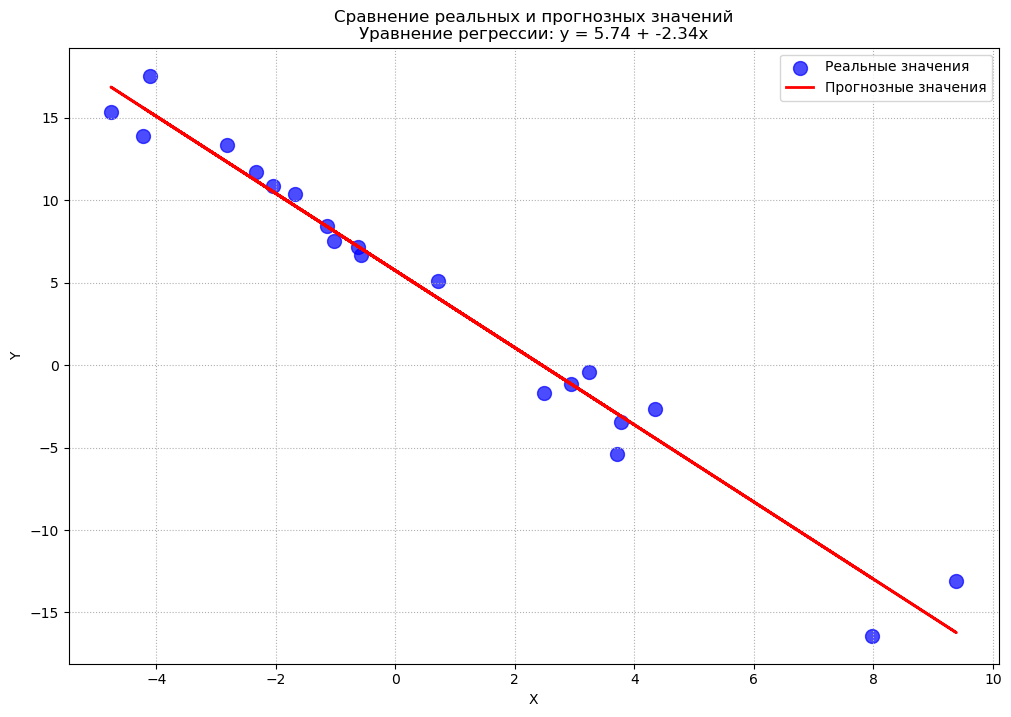

In [74]:
# Построение диаграммы
plt.figure(figsize=(12, 8))
plt.title('Сравнение реальных и прогнозных значений\n'
          f'Уравнение регрессии: y = {b0:.2f} + {b1:.2f}x')
plt.scatter(x, y, color='blue', label='Реальные значения', alpha=0.7, marker='o', s=100)
plt.plot(x, y_pred, lw=2, color='red', label='Прогнозные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(ls=':')
plt.show()

In [758]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации


In [78]:
absolute_errors = np.abs((y - y_pred) / y) * 100
mape = np.mean(absolute_errors)

print(f"Средняя ошибка аппроксимации (MAPE): {mape:.2f}%")

Средняя ошибка аппроксимации (MAPE): 35.26%


In [760]:
# КРИТЕРИЙ 8

# расчет F-критерия

# вывод о статистической значимости уравнения в целом


In [83]:
n = len(df3)  # количество наблюдений
k = 1         # количество независимых переменных
r2 = r2_score(y, y_pred)

# Расчет F-критерия
f_stat = (r2 / k) / ((1 - r2) / (n - k - 1))
# Расчет p-value для F-статистики
p_value = 1 - stats.f.cdf(f_stat, k, n - k - 1)

print(f"F-критерий: {f_stat:.4f}")
print(f"p-value: {p_value:.10f}")

# вывод о статистической значимости уравнения в целом
print("\nВывод о статистической значимости:")
if p_value < 0.05:
    print("Уравнение регрессии статистически значимо (p < 0.05)")
    print(f"Коэффициент детерминации R²: {r2:.4f}")
    print("Модель объясняет {:.2f}% вариации зависимой переменной".format(r2 * 100))
else:
    print("Уравнение регрессии статистически незначимо (p > 0.05)")

F-критерий: 592.2591
p-value: 0.0000000000

Вывод о статистической значимости:
Уравнение регрессии статистически значимо (p < 0.05)
Коэффициент детерминации R²: 0.9705
Модель объясняет 97.05% вариации зависимой переменной


In [762]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции

# вывод о статистической значимости коэффициентов регрессии

# запись диапазона коэффицентов регрессии


In [86]:
x = df3['x'].values
y = df3['y'].values
n = len(x)


# Остатки и остаточная сумма квадратов (SSE)
y_pred = b0 + b1 * x
residuals = y - y_pred
sse = np.sum(residuals**2)

# Среднее значение X
x_mean = np.mean(x)

# Сумма квадратов отклонений X (SSxx)
ssxx = np.sum((x - x_mean)**2)

# Остаточная дисперсия (MSE)
mse = sse / (n - 2)

# Стандартные ошибки коэффициентов
se_b1 = np.sqrt(mse / ssxx)
se_b0 = np.sqrt(mse * (1/n + x_mean**2 / ssxx))

# t-статистики
t_b1 = b1 / se_b1
t_b0 = b0 / se_b0

# Критическое значение t-распределения (α=0.05, двусторонний)
t_crit = stats.t.ppf(0.975, df=n-2)

# Доверительные интервалы (95%)
ci_b1 = (b1 - t_crit*se_b1, b1 + t_crit*se_b1)
ci_b0 = (b0 - t_crit*se_b0, b0 + t_crit*se_b0)

print(f"Стандартная ошибка b0: {se_b0:.4f}")
print(f"Стандартная ошибка b1: {se_b1:4f}")
print(f"t-критерий для b0: {t_b0:.4f}")
print(f"t-критерий для b1: {t_b1:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")
print(f"95% ДИ для b0: [{ci_b0[0]:.4f}, {ci_b0[1]:.4f}]")
print(f"95% ДИ для b1: [{ci_b1[0]:.4f}, {ci_b1[1]:.4f}]")


Стандартная ошибка b0: 0.3755
Стандартная ошибка b1: 0.096117
t-критерий для b0: 15.2879
t-критерий для b1: -24.3364
Критическое значение t: ±2.1009
95% ДИ для b0: [4.9518, 6.5297]
95% ДИ для b1: [-2.5411, -2.1372]


* Результаты показывают отличное качество регрессионной модели
* Наклон модели (b₁ = 1.82) статистически значимо отличается от нуля, что подтверждает наличие линейной зависимости.
* Свободный член незначим, что может указывать на отсутствие систематического смещения при x=0.

In [764]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6


In [88]:
# Среднее X
x_mean = np.mean(x)
# Сумма квадратов отклонений X
ssxx = np.sum((x - x_mean)**2) 
# Остаточная дисперсия 
mse = sse/(n-2)       

#  Точечный прогноз при x0=6
x0 = 6
y_pred = b0 + b1 * x0

# Стандартная ошибка предсказания
se_pred = np.sqrt(mse * (1 + 1/n + (x0 - x_mean)**2 / ssxx))

# t-критическое значение (95% доверительный интервал, α=0.05)
t_crit = stats.t.ppf(0.975, df=n-2)

# Границы интервала
lower = y_pred - t_crit * se_pred
upper = y_pred + t_crit * se_pred

print(f"Точечный прогноз при x0=6: {y_pred:.2f}")
print(f"95% доверительный интервал: [{lower:.4f}, {upper:.4f}]")

Точечный прогноз при x0=6: -8.29
95% доверительный интервал: [-12.0169, -4.5712]


---

# Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [89]:
# считывание файла
df4 = pd.read_csv('ex4.csv') 

In [90]:
df4.head()

,x1,x2,y
0,13.637973,12.069977,-9.893143
1,-6.443507,23.970769,137.003862
2,9.361274,14.760979,20.571415
3,1.619709,24.043092,93.407384
4,-1.050608,21.837863,95.041511


In [91]:
df_info(df4)

Названия столбцов
Index(['x1', 'x2', 'y'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      20 non-null     float64
 1   x2      20 non-null     float64
 2   y       20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes
None
-----------------------------------------------------------------------------------------
Статистические данные
          x1     x2       y
count  20.00  20.00   20.00
mean    4.23  20.65   66.29
std     5.37   5.61   35.57
min    -6.44  10.53   -9.89
25%     0.25  17.28   42.55
50%     4.67  21.63   63.16
75%     9.15  24.94   92.81
max    13.64  30.24  137.00
-----------------------------------------------------------------------------------------
Типы данных:
 x1    float64
x2    float64


In [769]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)

# вывод о корректности использования модели множественной регрессии

# расчет коэффициентов корреляции

# вывод о необходимости устранения какого-либо фактора


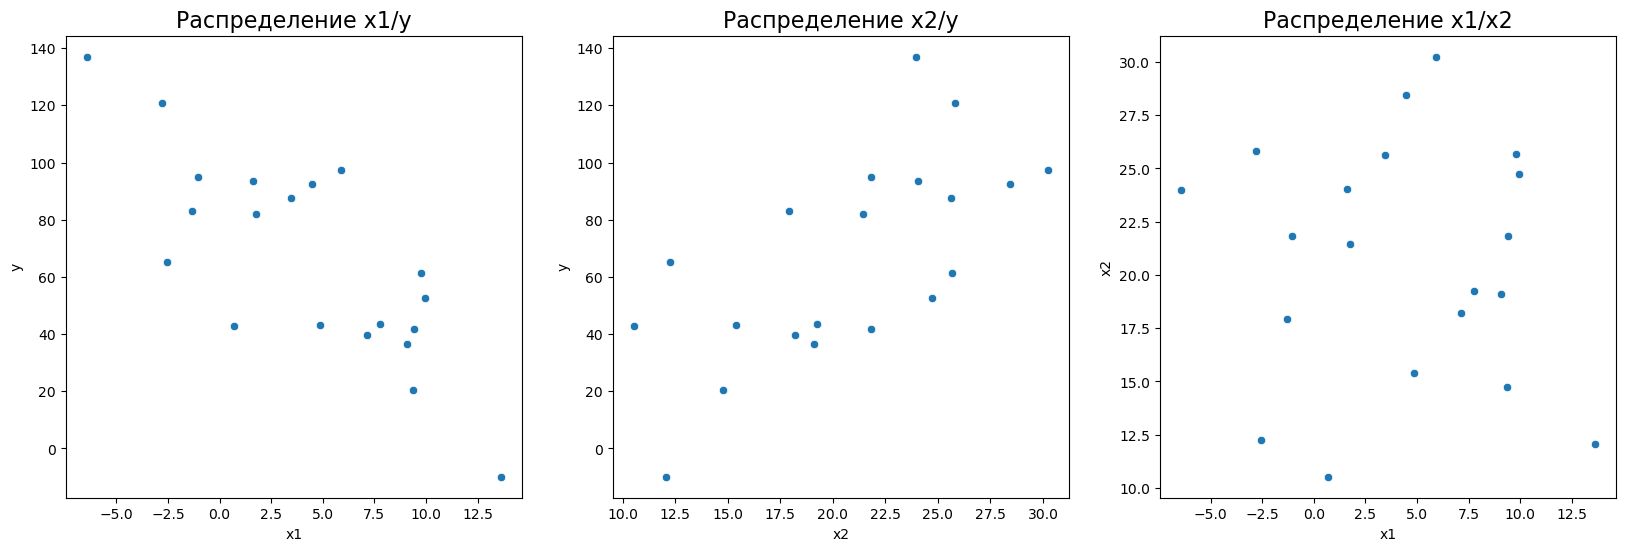

In [92]:
# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

scat1 = sns.scatterplot(x='x1', y='y', data=df4, ax=axes[0])
scat1.set_title('Распределение x1/y', fontsize=16)

scat2 = sns.scatterplot(x='x2', y='y', data=df4, ax=axes[1])
scat2.set_title('Распределение x2/y', fontsize=16)

scat3 = sns.scatterplot(x='x1', y='x2', data=df4, ax=axes[2])
scat3.set_title('Распределение x1/x2', fontsize=16)

plt.show()

По диаграммам рассеяния можно предположить обратную зависимость y от x1, прямую от x2 и отсутствие корреляции между x1 и x2. При таких условиях модель множественной регрессии должна подойти.

In [95]:
# Расчет коэффициентов корреляции
corr_x1y = df4['x1'].corr(df4['y'])
corr_x2y = df4['x2'].corr(df4['y'])
corr_x1x2 = df4['x1'].corr(df4['x2'])

print(f"Корреляция x1-y: {corr_x1y:.10f}")
print(f"Корреляция x2-y: {corr_x2y:.10f}")
print(f"Корреляция x1-x2: {corr_x1x2:.10f}")

Корреляция x1-y: -0.7878073658
Корреляция x2-y: 0.6698344131
Корреляция x1-x2: -0.0750133309


In [94]:
corr_matrix = df4.corr()
corr_matrix

,x1,x2,y
x1,1.000000,-0.075013,-0.787807
x2,-0.075013,1.000000,0.669834
y,-0.787807,0.669834,1.000000


По матрице корреляции видно сильное влияние на y обоих переменных и при этом практически полное отсутствие корреляции между самими переменными. Это позволяет сделать вывод о том, что не нужно устранять никакой из факторов.

In [771]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии


In [98]:
# стандартизируем данные
x1 = (df4['x1']-df4['x1'].mean())/df4['x1'].std()
x2 = (df4['x2']-df4['x2'].mean())/df4['x2'].std()
y = (df4['y']-df4['y'].mean())/df4['y'].std()
X = np.array([x1, x2]).T
# добавляем интерцепт
X = sm.add_constant(X)

# создаем модель множественной регрессии
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.90e-21
Time:                        06:47:42   Log-Likelihood:                 26.749
No. Observations:                  20   AIC:                            -47.50
Df Residuals:                      17   BIC:                            -44.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.551e-17      0.015    3.6e-15      1.0

In [779]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике


In [99]:
b_x1 = model.params.x1 * df4['y'].std() / df4['x1'].std()
b_x2 = model.params.x2 * df4['y'].std() / df4['x2'].std()
a = df4['y'].mean() - b_x1 * df4['x1'].mean() - b_x2 * df4['x2'].mean()
print(f'Коэффициенты чистой регрессии: a = {a}, b_x1 = {b_x1}, b_x2 = {b_x2}')

Коэффициенты чистой регрессии: a = 6.722076359546847, b_x1 = -4.917384791357818, b_x2 = 3.892684581539494


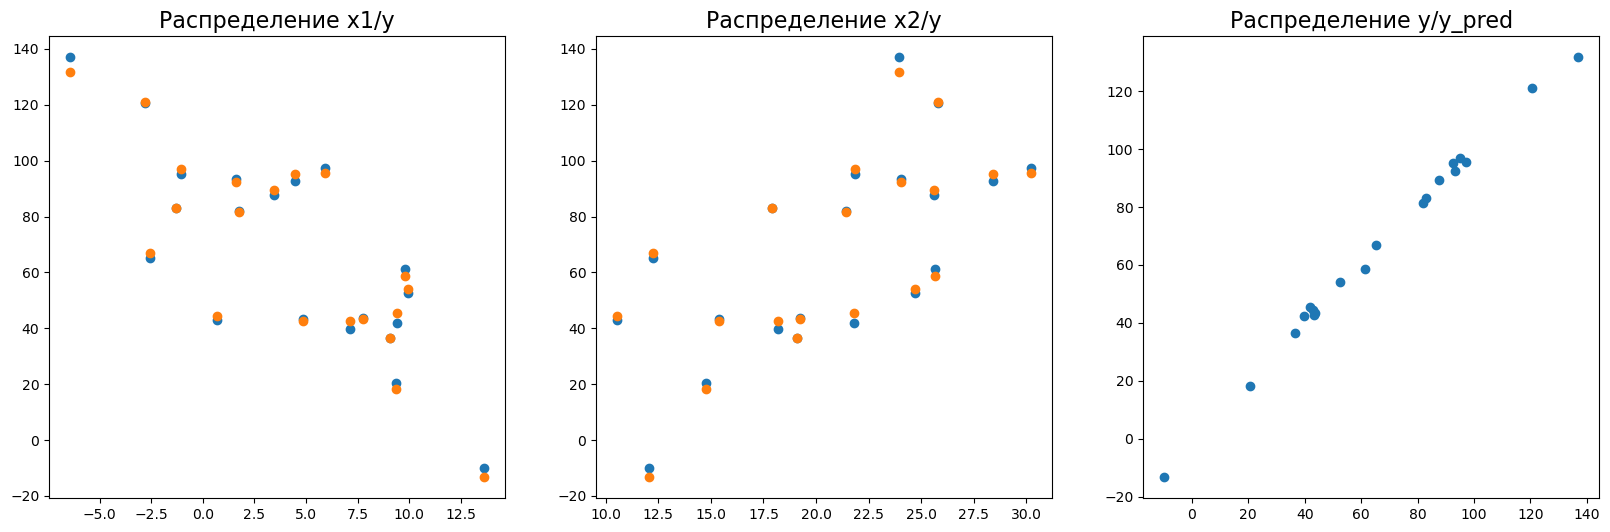

In [100]:
# построение диаграмм рассеяния прогнозных и реальных значений на одном графике с помощью библиотеки seaborn
df4['y_pred'] = a + b_x1 * df4['x1'] + b_x2 * df4['x2']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].scatter(df4['x1'], df4['y'])
axes[0].scatter(df4['x1'], df4['y_pred'])
axes[0].set_title('Распределение x1/y', fontsize=16)

axes[1].scatter(df4['x2'], df4['y'])
axes[1].scatter(df4['x2'], df4['y_pred'])
axes[1].set_title('Распределение x2/y', fontsize=16)

axes[2].scatter(df4['y'], df4['y_pred'])
axes[2].set_title('Распределение y/y_pred', fontsize=16)

plt.show()

In [781]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции

# расчет F-критерия

# вывод о статистической значимости уравнения в целом

In [103]:
r_x1 = corr_matrix['y']['x1']
r_x2 = corr_matrix['y']['x2']
R = model.params.x1 * r_x1 + model.params.x2 * r_x2


n = df4.shape[0]
F = (R**2 / (1 - R**2)) * ((n - 1 - 2)/ 2)
F_crit = stats.f.ppf(1-0.05, 2, n - 1 - 2)

print(f'Индекс множественной регрессии R = {R}')
print(f'\n')
print(f'F={F}, F_crit={F_crit}')

Индекс множественной регрессии R = 0.995752543861612


F=994.2284366836553, F_crit=3.5915305684750827


Так как рассчитанный F-критерий намного больше критического, признаем уравнение статистически значимым.

In [783]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике

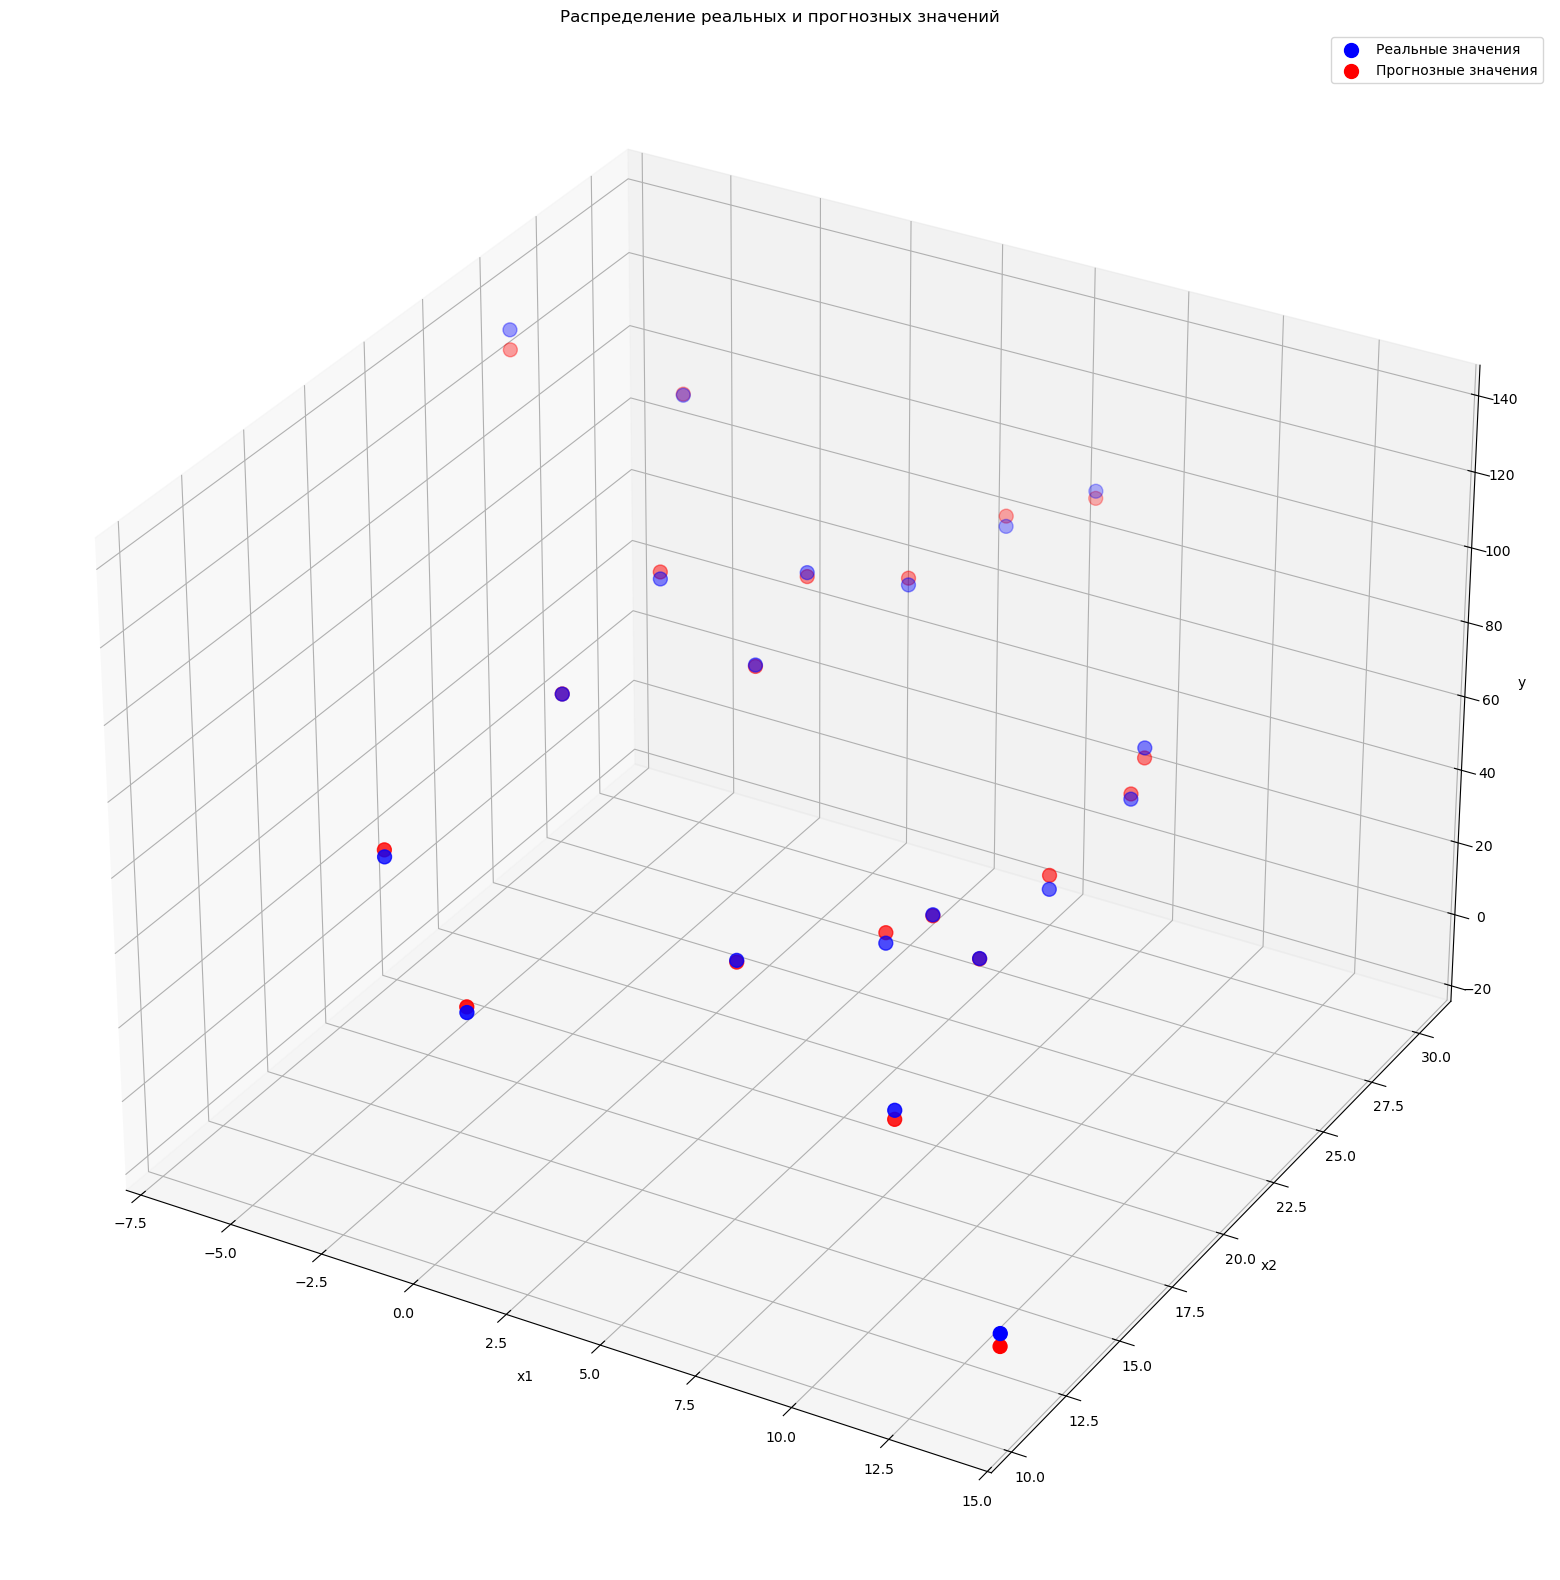

In [111]:
# построение 3D-изображения прогнозных и реальных значений на одном графике
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

# Реальные значения
ax.scatter(df4['x1'], df4['x2'], df4['y'], color='blue', label='Реальные значения', marker='o', s=100)

# Прогнозные значения
ax.scatter(df4['x1'], df4['x2'], df4['y_pred'], color='red', label='Прогнозные значения', marker='o', s=100)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Распределение реальных и прогнозных значений')
ax.legend()
plt.show()

In [117]:
# Создание интерактивного 3D-графика
fig = go.Figure()

# Добавление реальных значений
fig.add_trace(go.Scatter3d(
    x=df4['x1'],
    y=df4['x2'],
    z=df4['y'],
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.8
    ),
    name='Реальные значения'
))

# Добавление прогнозных значений
fig.add_trace(go.Scatter3d(
    x=df4['x1'],
    y=df4['x2'],
    z=df4['y_pred'],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        opacity=0.8
    ),
    name='Прогнозные значения'
))

# Настройка макета
fig.update_layout(
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='y',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=0.1)  # Начальный угол обзора
        )
    ),
    title='Интерактивная 3D визуализация реальных и прогнозных значений',
    width=1200,
    height=1000,
    margin=dict(r=20, l=10, b=10, t=50)
)

# Отображение графика
fig.show()
